In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/train.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The **.info() method** provides information about the DataFrame, including the data types and the number of non-null values in each column.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observation**: The dataset has 891 rows and 12 columns with missing values in the Age, Cabin, and Embarked columns.

--------------------------------------------------------------------------------

The **.describe() method** gives us a statistical summary (descriptive statistics) of the numerical columns.

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations:**

Survived: Around 38.4% of the passengers in this dataset survived.

Pclass: The majority of passengers were in 3rd class.

Age: The average age of passengers was about 30 years, with a wide range from infants to elderly.

Fare: The fare distribution is highly skewed, with a maximum fare of 512, while the median fare is only 14.45. (in $)

--------------------------------------------------------------------------------

The **.value_counts() method** shows the number of passengers for each category in key categorical columns.

In [10]:
data.value_counts()

,,,,,,,,,,,,count
PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,1
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,1
873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,1
880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1


**Observation:**

**Survival:**    Did not survive (0): 549 | Survived (1): 342

**Passenger Class (Pclass):**   3rd Class: 491 | 1st Class: 216 | 2nd Class: 184

**Sex:**    Male: 577 | Female: 314

**Port of Embarkation (Embarked):** Southampton (S): 644 | Cherbourg (C): 168 | Queenstown (Q): 77

--------------------------------------------------------------------------------

**The Pairplot** helps us visualize the relationships between pairs of key features, colored by survival status.

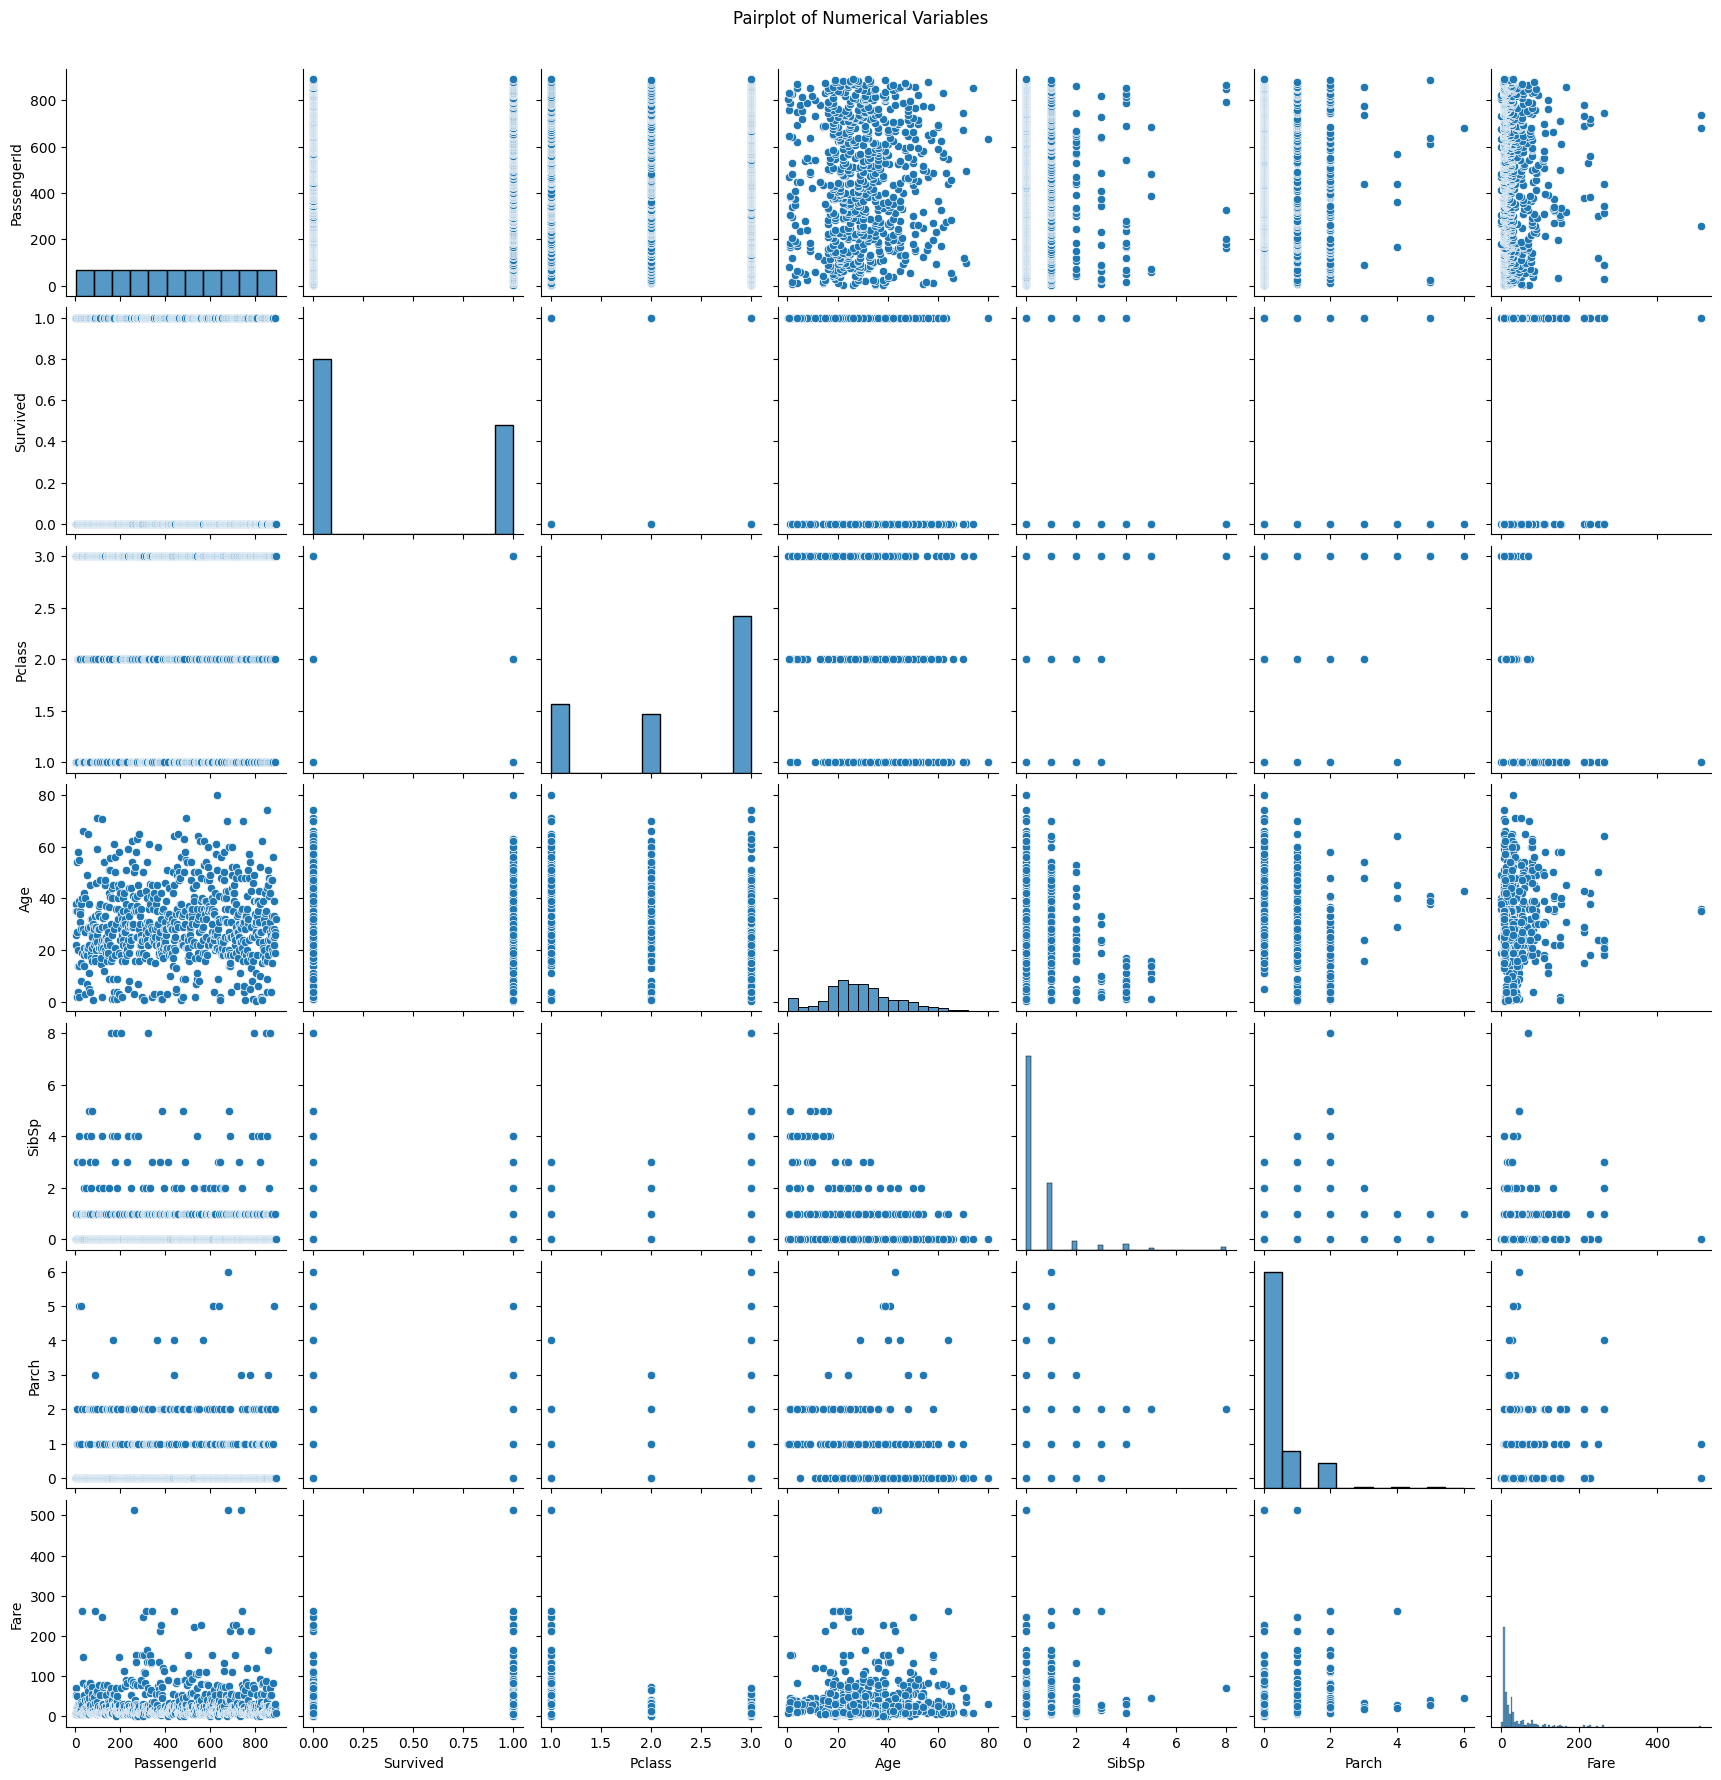

In [11]:
sns.pairplot(data.select_dtypes(include=np.number))
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

**Main Observations:**

**Pclass and Survival:** The plots clearly show that Pclass 1 has the highest survival rate, while Pclass 3 has the lowest.

**Fare and Survival:** Passengers who paid a higher Fare had a better chance of survival. This is evident in the Fare vs. Survived plot.

**Age and Survival:** The relationship with Age is more complex. While there are survivors across all age groups, the density plot for Age shows that very young children had a higher survival rate.

--------------------------------------------------------------------------------

**Heatmaps** show the correlation between the numerical features. A value close to 1 means a strong positive correlation, and a value close to -1 means a strong negative correlation.

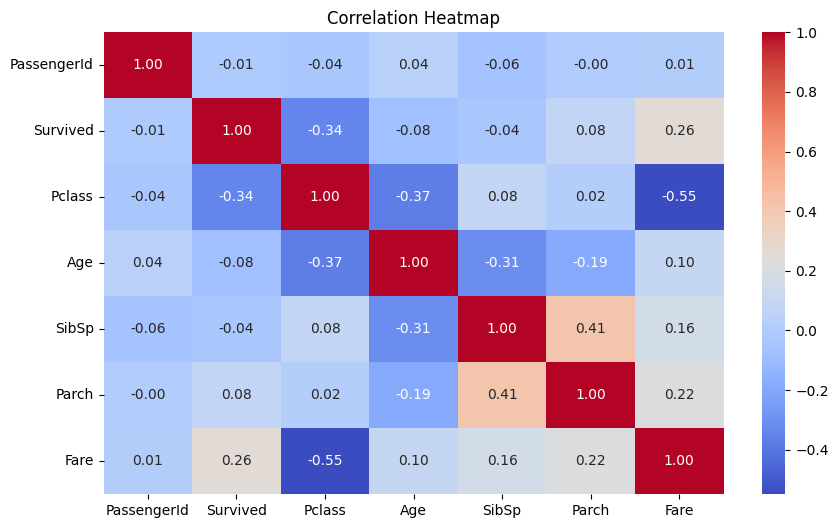

In [18]:
plt.figure(figsize=(10, 6))
corr_matrix = data[num_columns].corr()  # correlation only for numeric columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observations:**

**Survived and Pclass:** There is a negative correlation of -0.34 between Survived and Pclass. This means that as the passenger class number goes up (from 1st to 3rd), the survival rate goes down.

**Fare and Pclass:** A strong negative correlation of -0.55 exists between Fare and Pclass. This makes sense, as 1st class tickets (Pclass=1) are the most expensive.

**Survived and Fare:** There's a positive correlation of 0.26 between Survived and Fare, suggesting that passengers who paid higher fares were more likely to survive.

**SibSp and Parch:** SibSp (siblings/spouses) and Parch (parents/children) have a positive correlation of 0.41, which is expected as they both relate to family size.

--------------------------------------------------------------------------------

**Histograms** show the distribution of features.

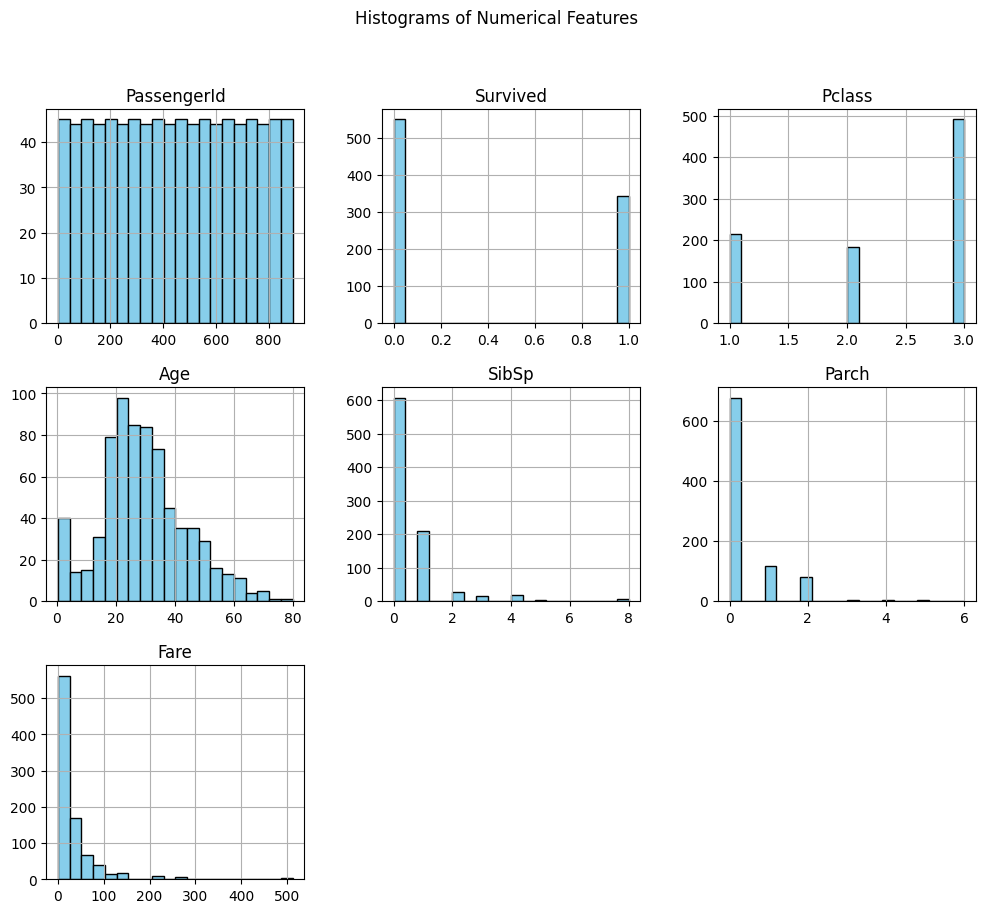

In [19]:
num_columns = data.select_dtypes(include=np.number).columns  # only numeric columns
data[num_columns].hist(figsize=(12, 10), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Features")
plt.show()

**Main Observations:**

**Age Distribution:** The age distribution is somewhat bimodal. There's a peak for young children (around ages 0-4) and another larger peak for young adults (in their 20s and 30s).

**Fare, Parch and Sibsp Distribution:** These distributions is heavily skewed to the right.

--------------------------------------------------------------------------------

**Boxplots** are great for comparing distributions across different categories.

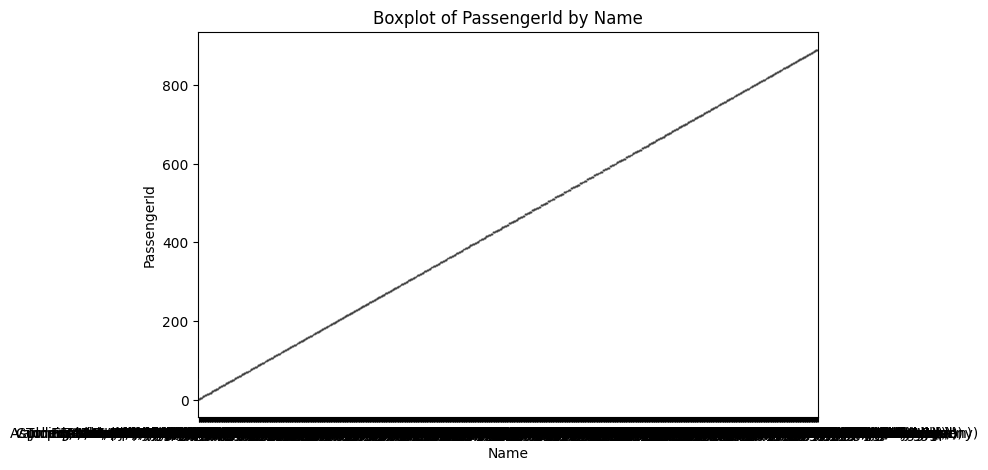

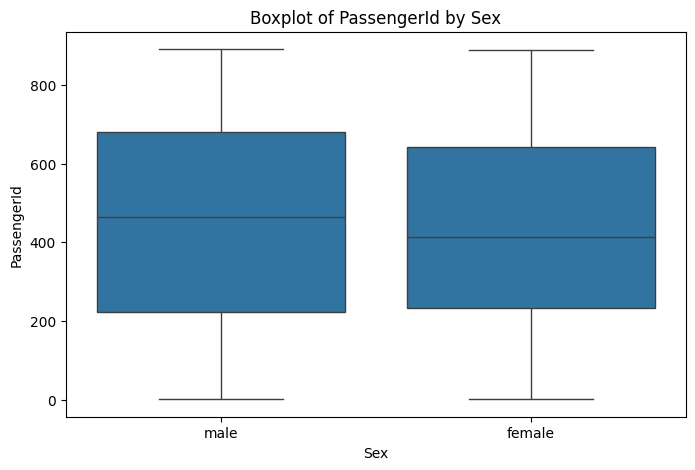

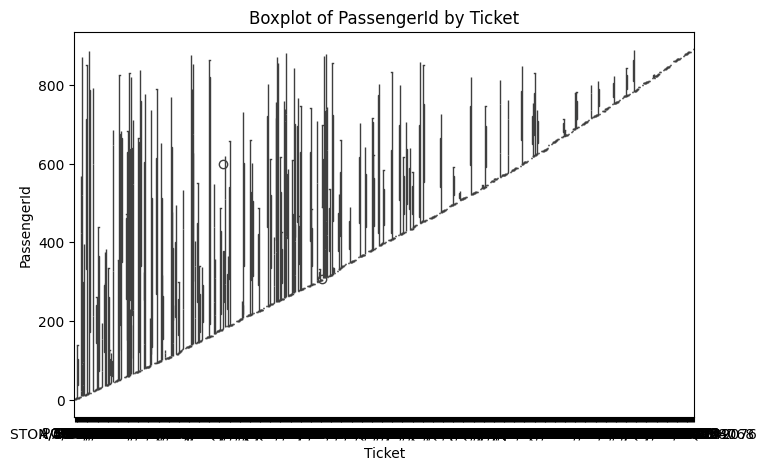

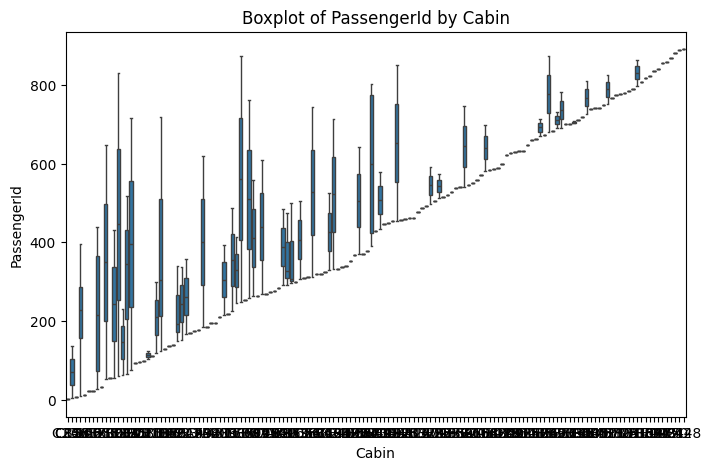

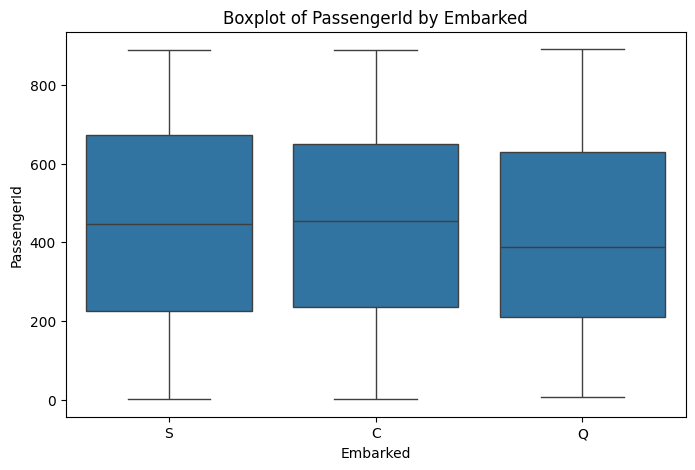

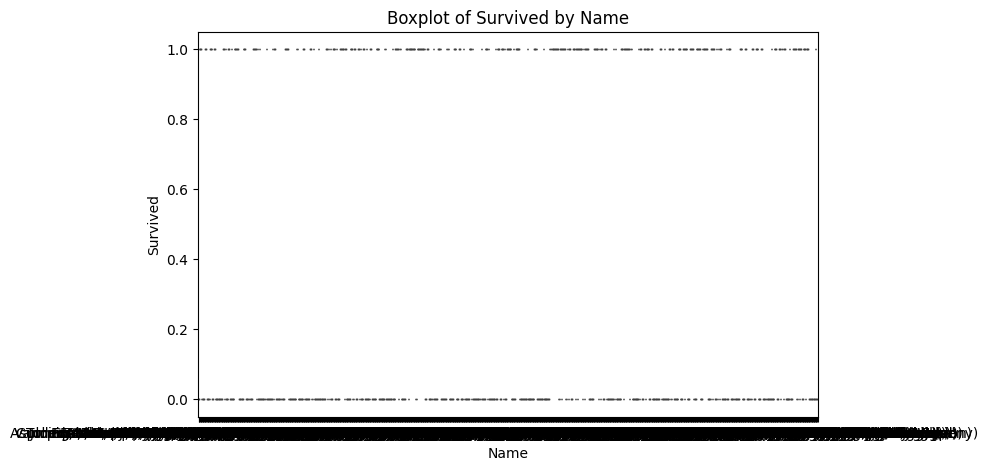

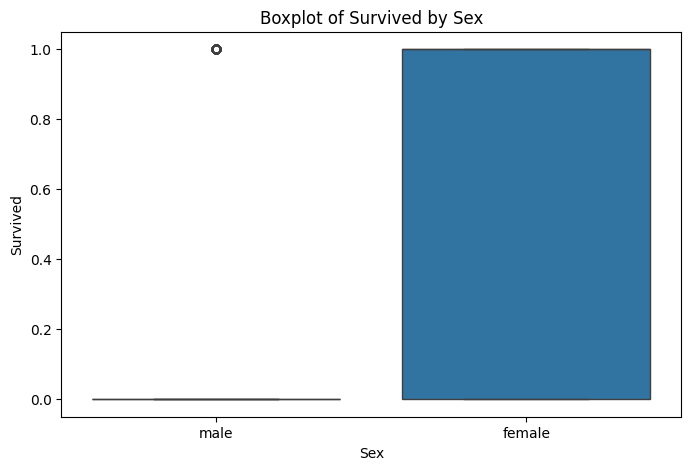

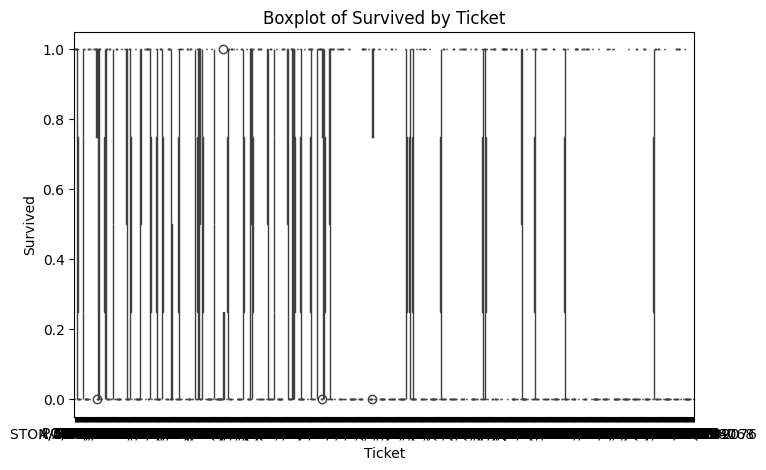

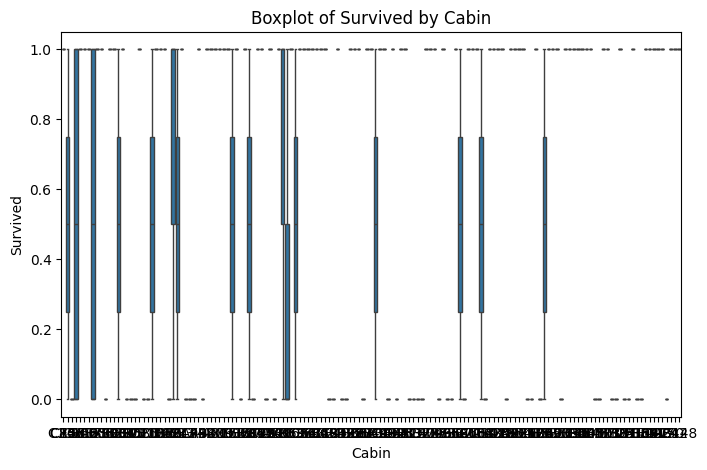

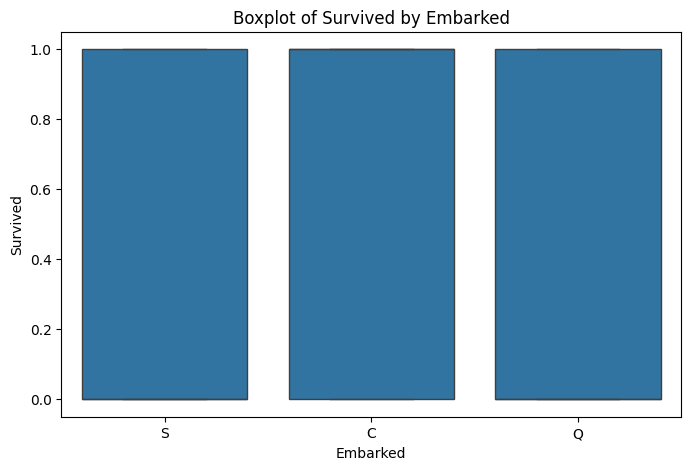

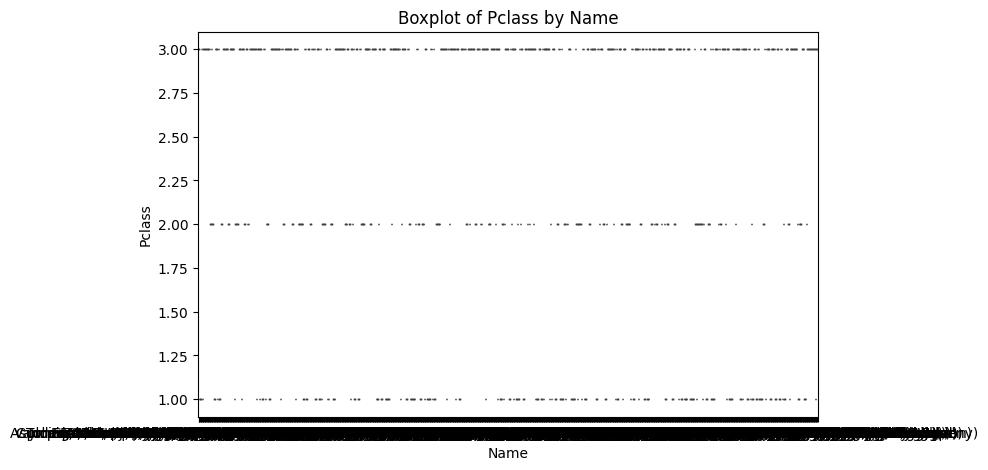

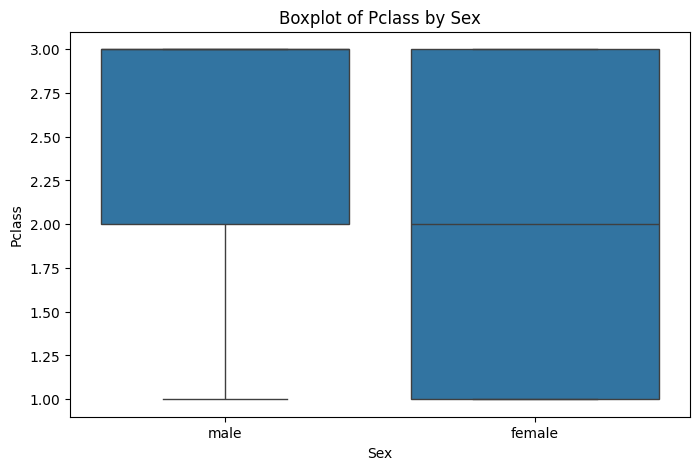

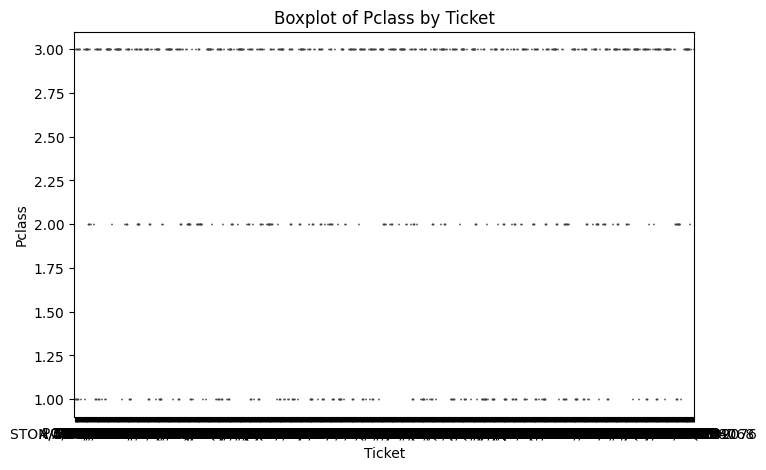

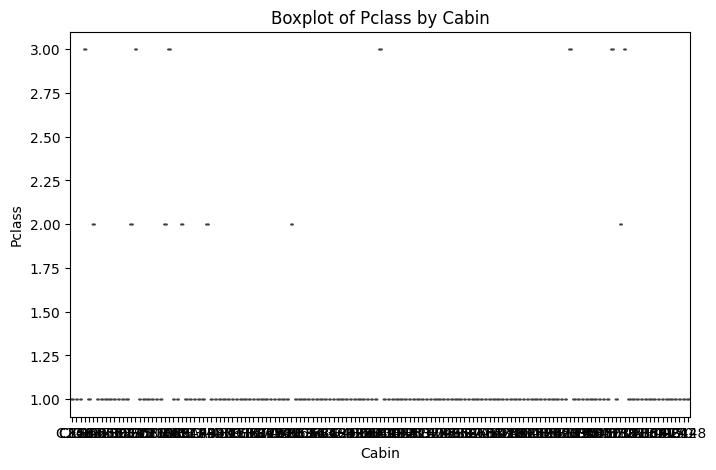

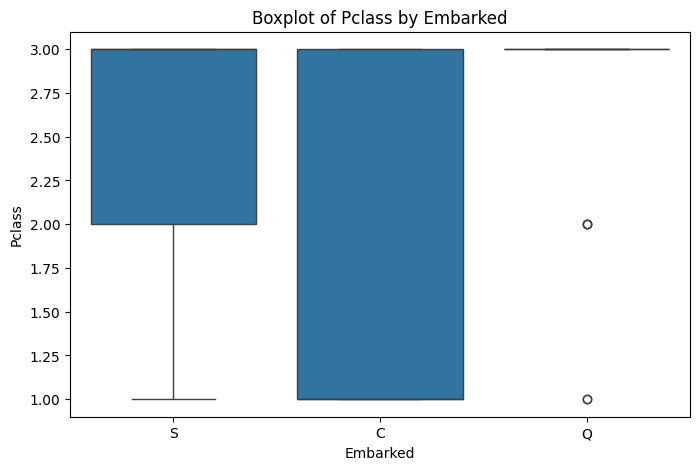

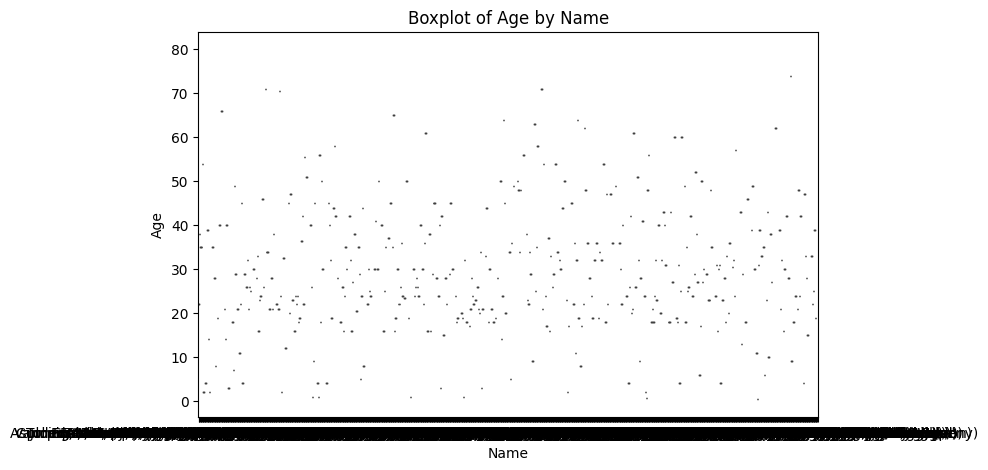

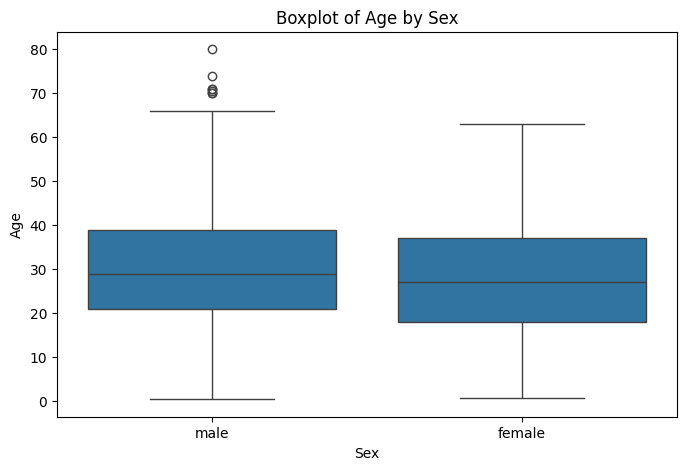

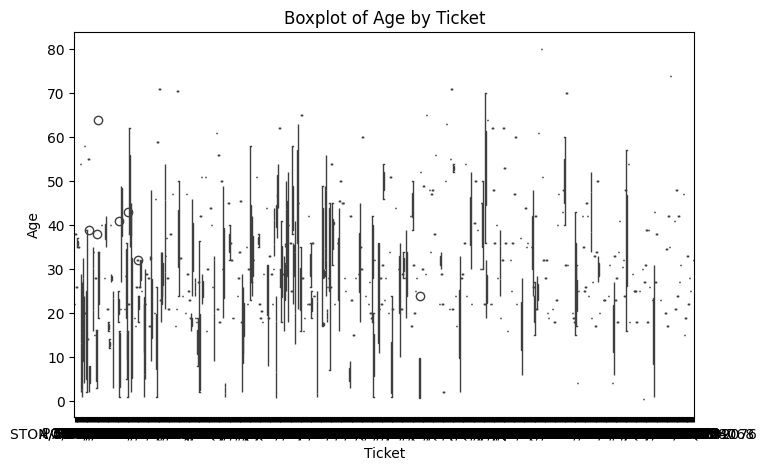

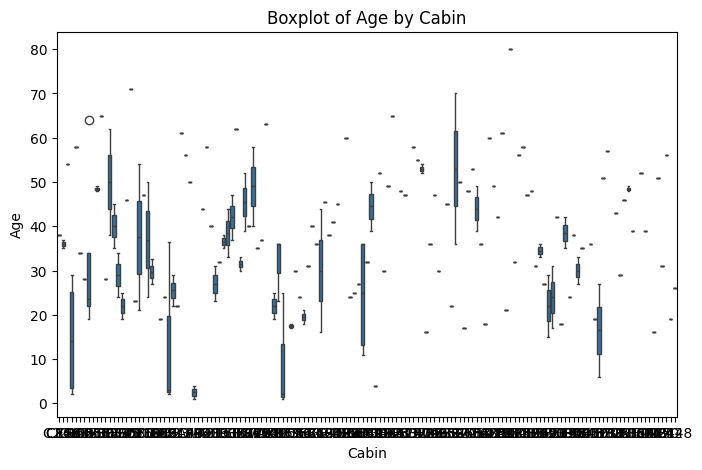

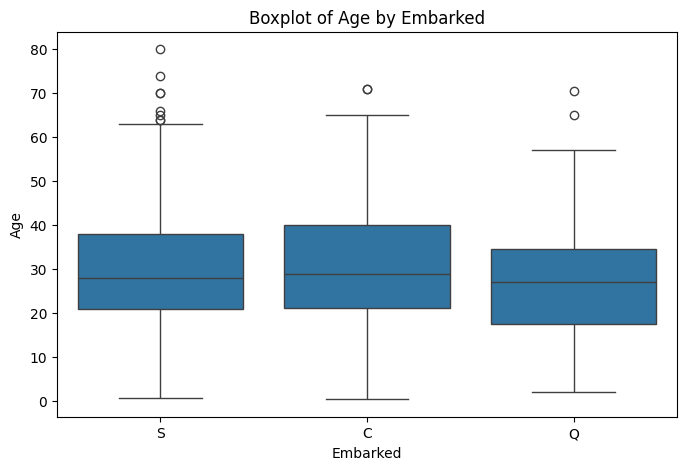

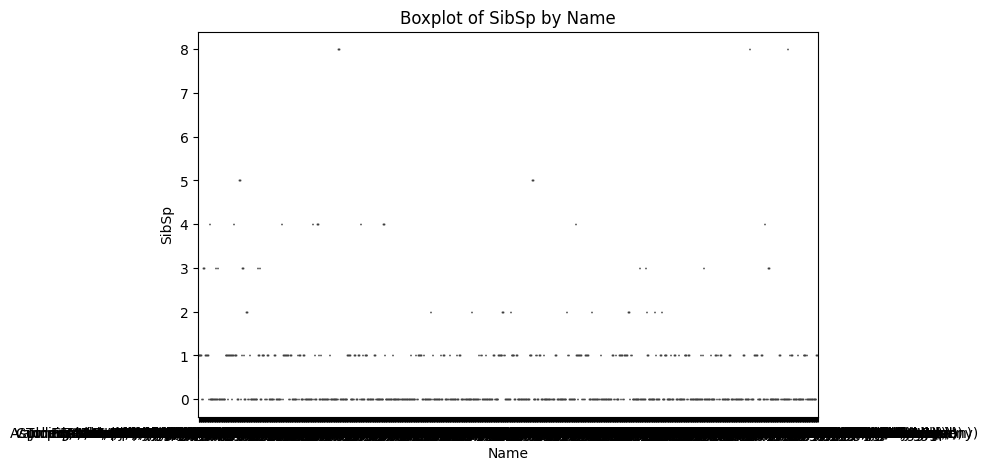

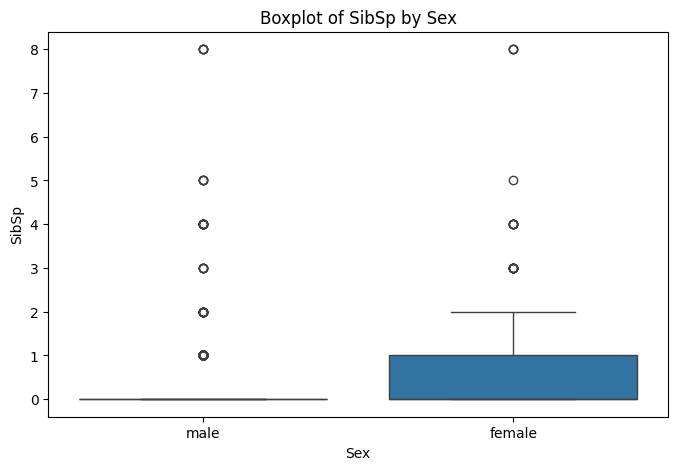

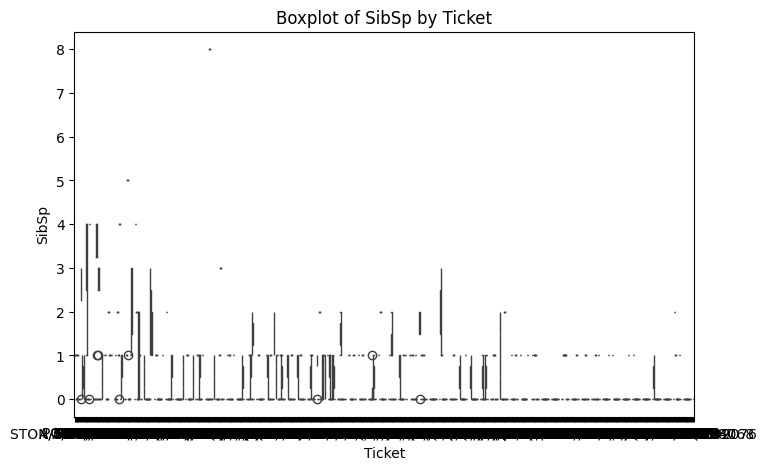

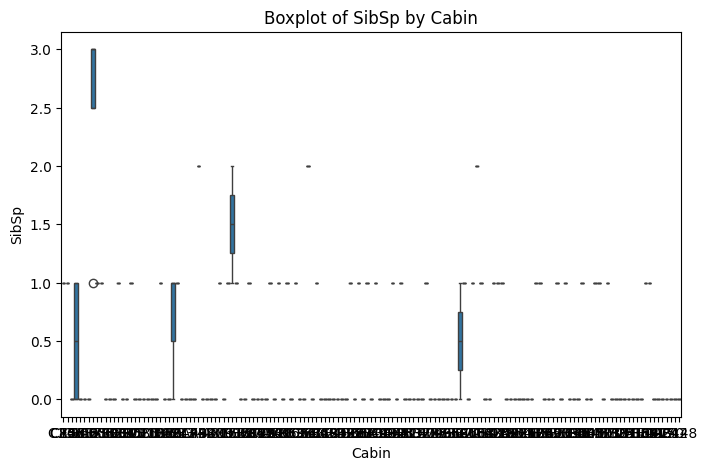

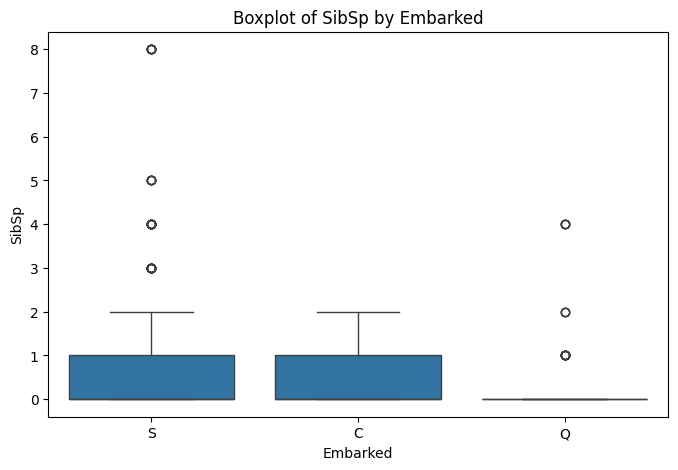

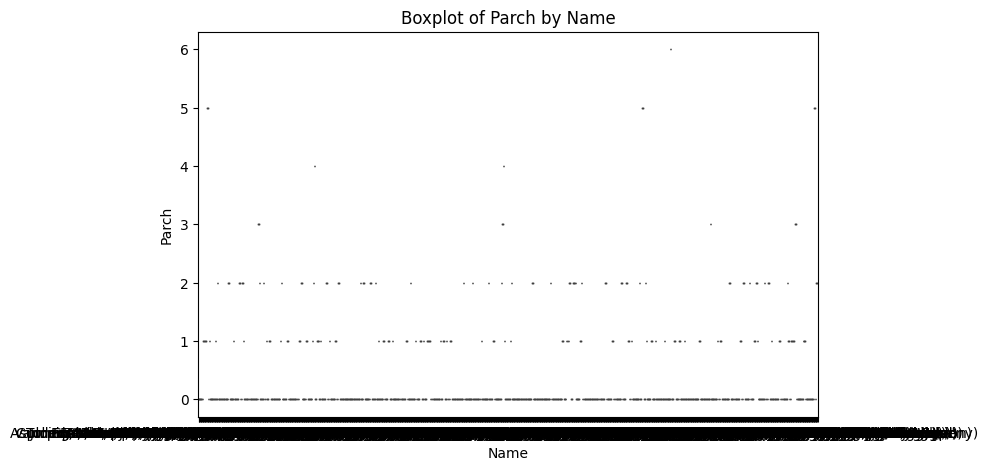

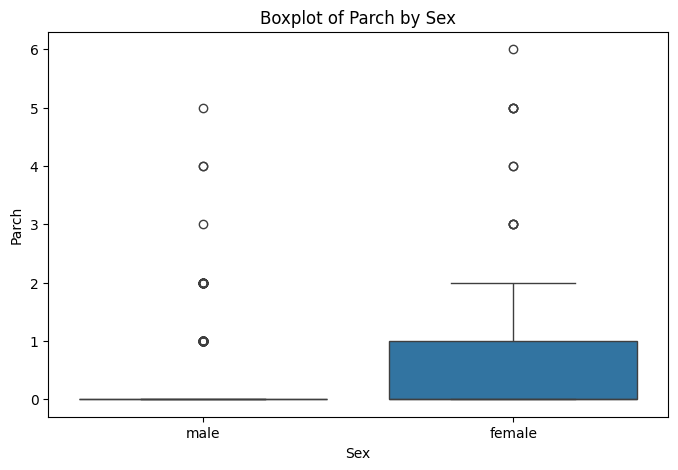

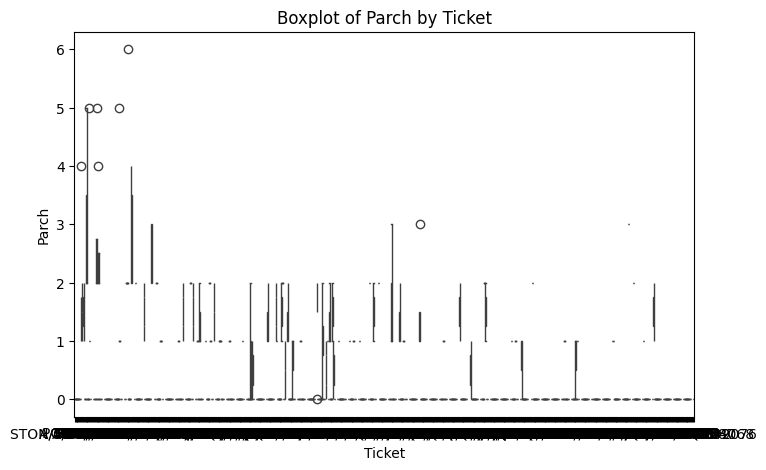

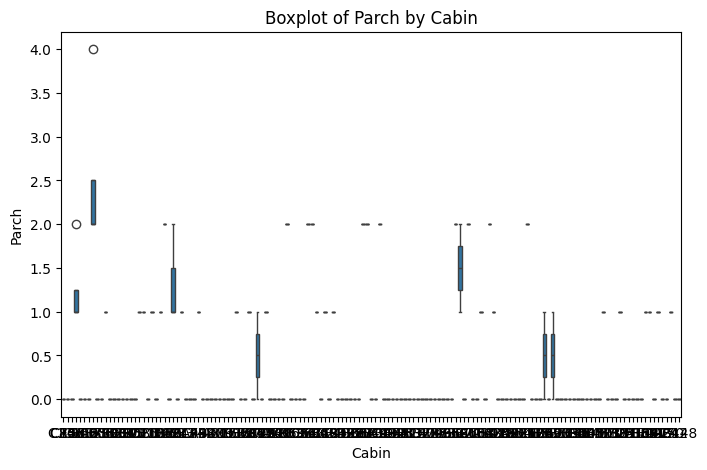

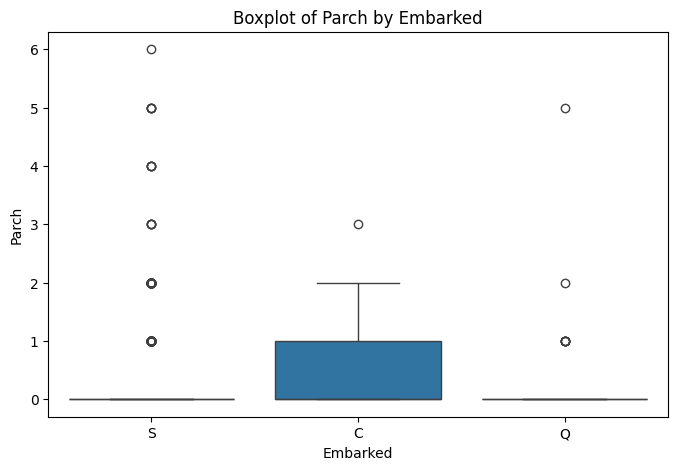

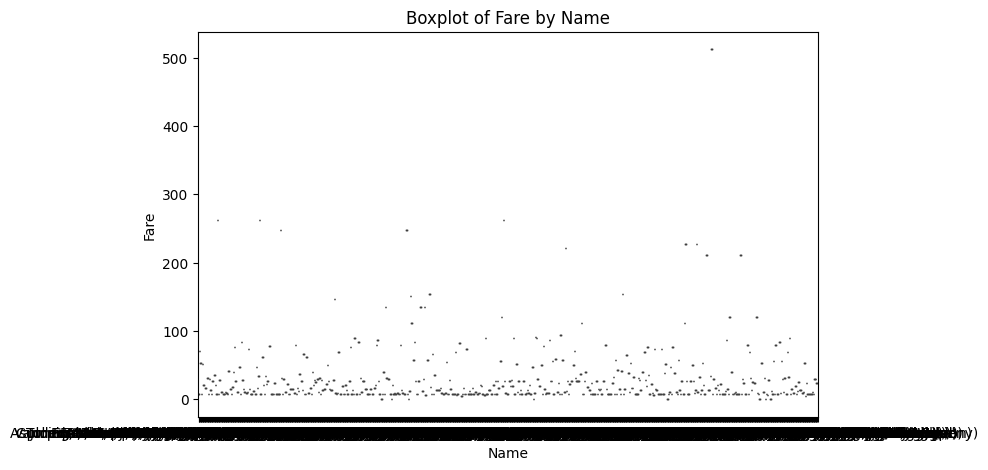

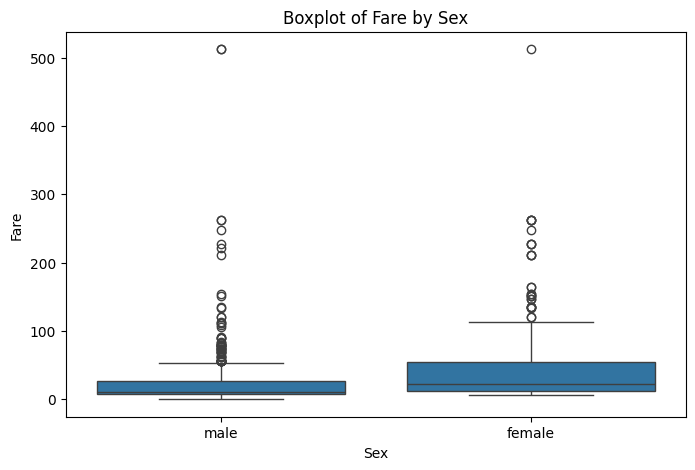

In [ ]:
cat_columns = data.select_dtypes(include=['object']).columns
for col in num_columns:
    for cat in cat_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=cat, y=col, data=data)
        plt.title(f"Boxplot of {col} by {cat}")
        plt.show()

**Main Observations:**

**Age and Survival:** The median age of survivors is slightly lower than that of non-survivors. The box for survivors is also smaller, suggesting less variability in age among those who survived.

**Fare and Survival:** Passengers who survived generally paid a much higher fare. The median fare for survivors is significantly higher than for those who did not survive.

**Age and Passenger Class:** 1st class passengers were, on average, older than 2nd and 3rd class passengers.

**Age by Sex and Survival:** Women have a much higher survival rate than men, as indicated by the larger number of survivors (orange) in the "female" category across different ages.


--------------------------------------------------------------------------------

**Scatter plot** shows the relationship between columns, with points colored by survival status.

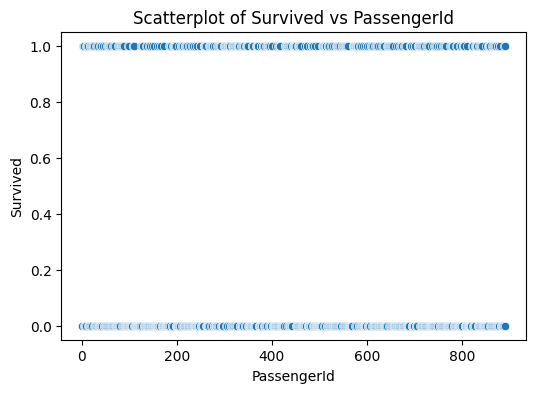

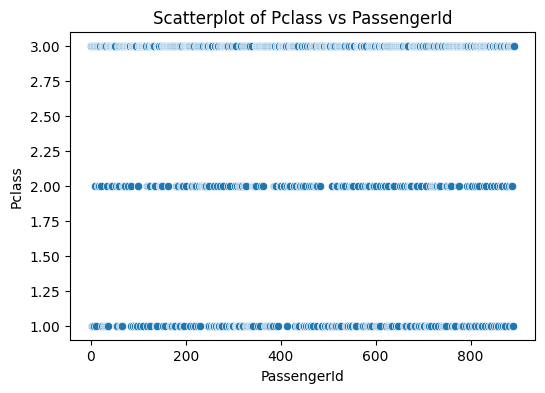

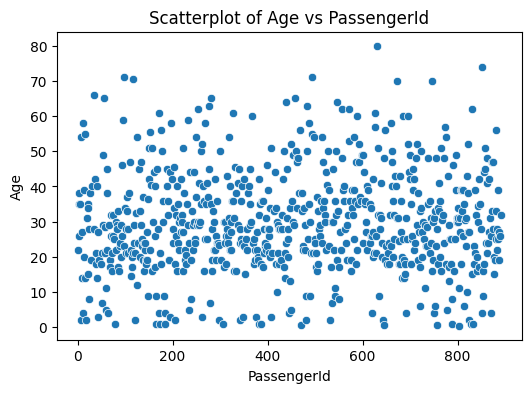

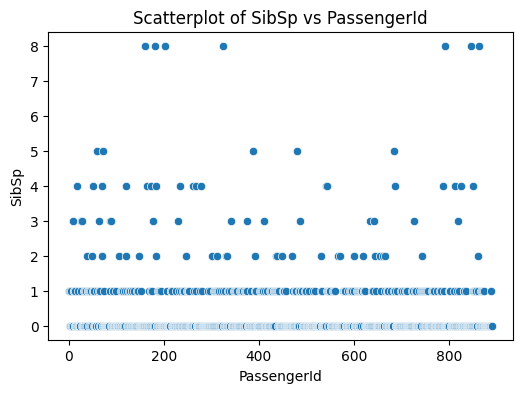

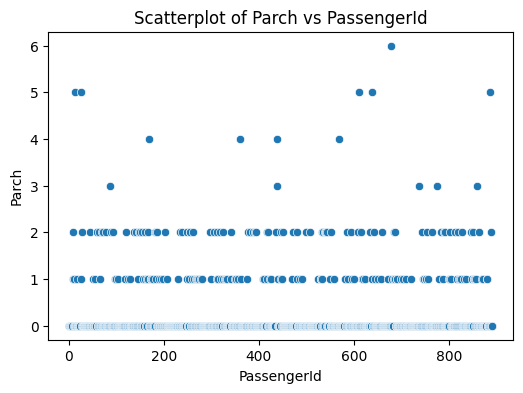

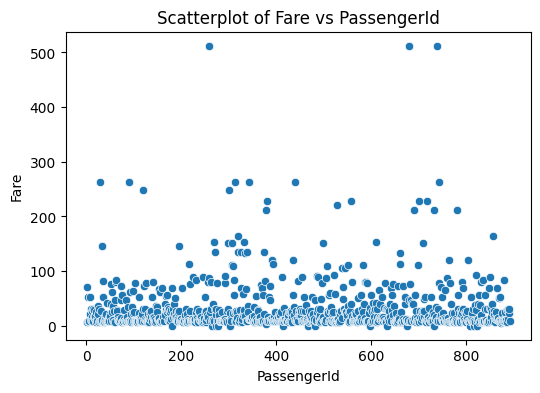

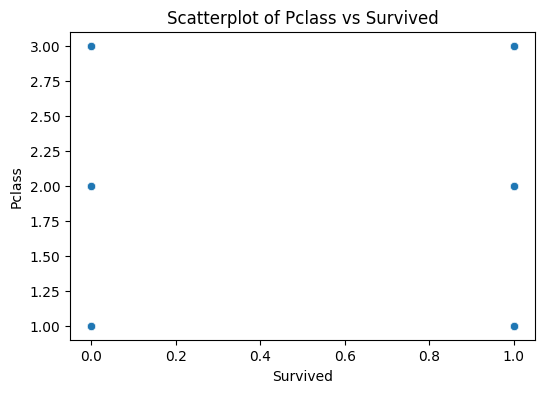

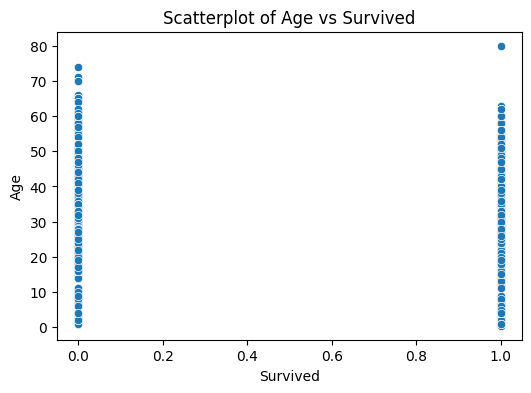

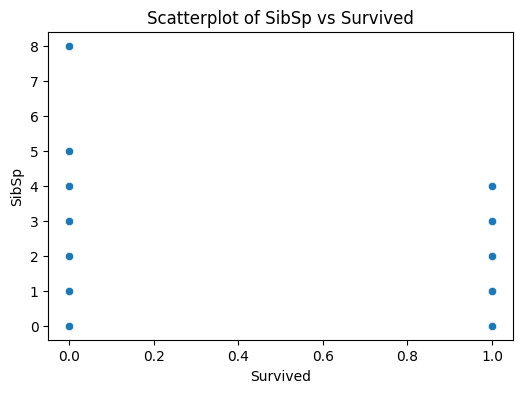

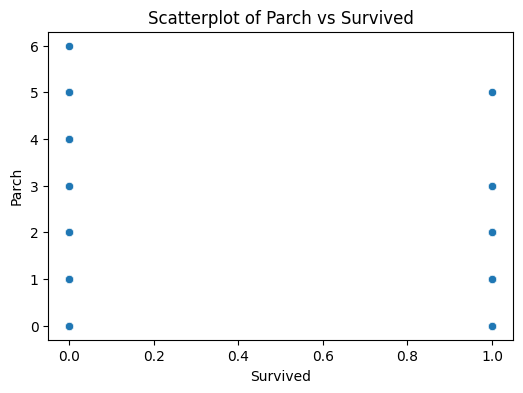

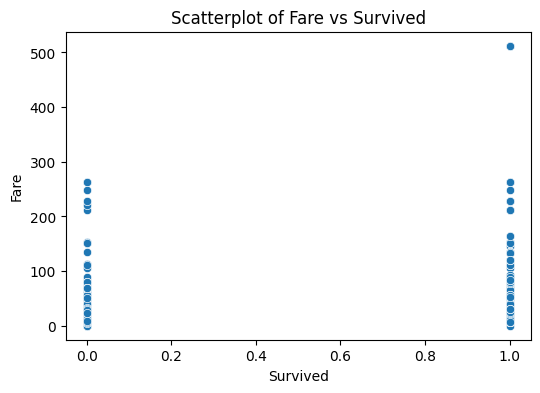

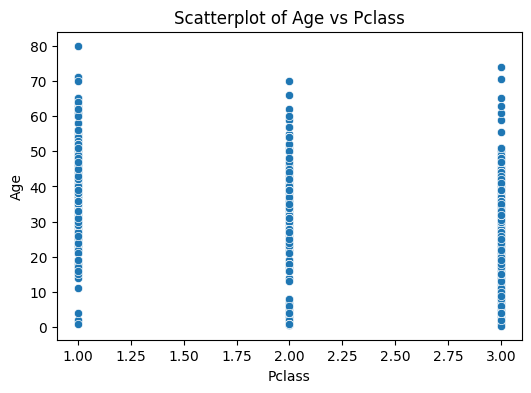

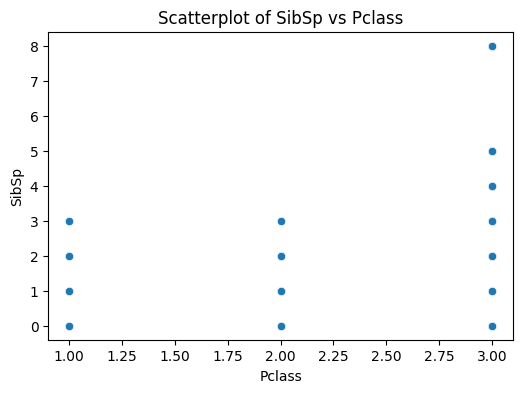

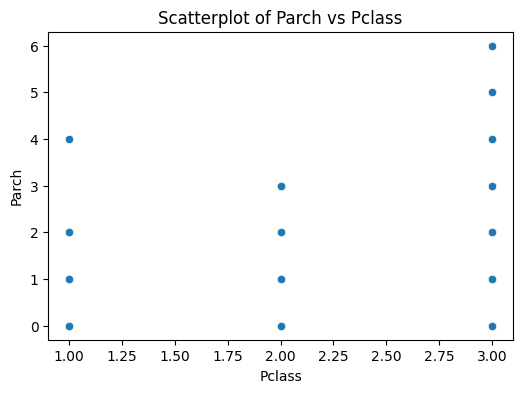

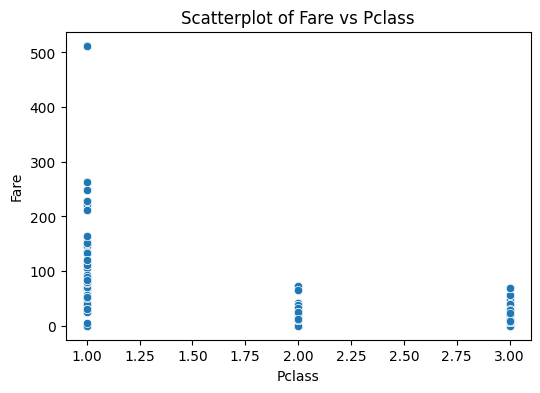

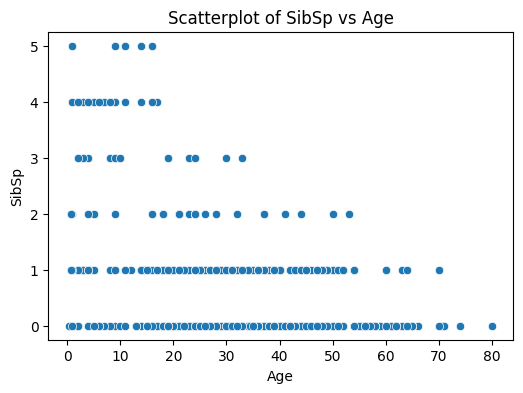

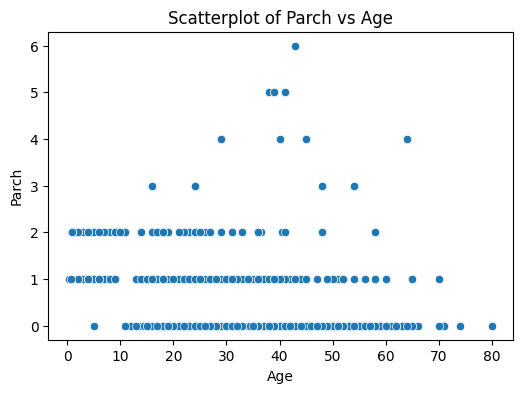

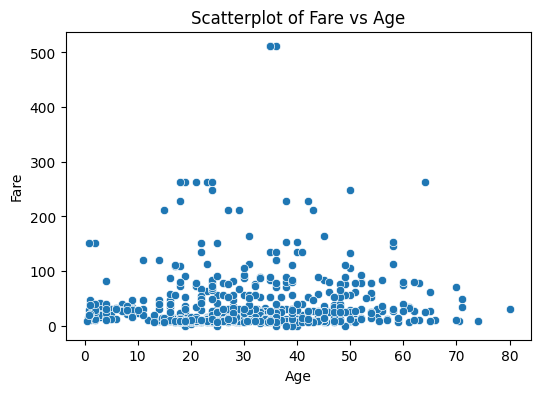

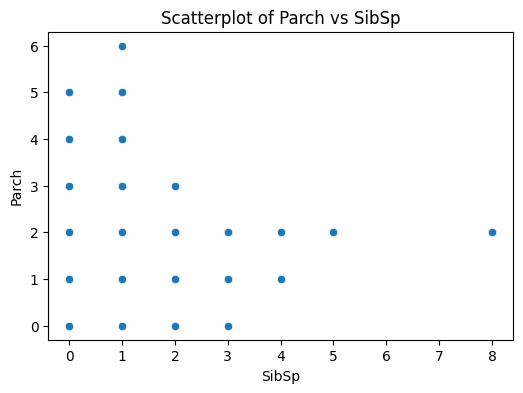

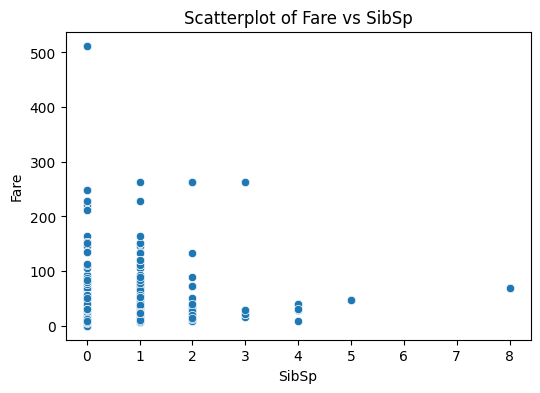

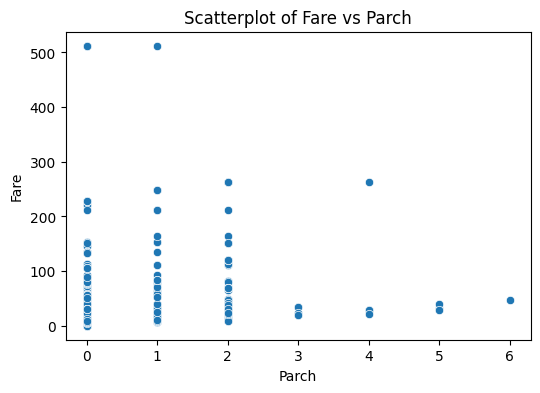

In [26]:
import itertools
for col_x, col_y in itertools.combinations(num_columns, 2):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col_x, y=col_y, data=data)
    plt.title(f"Scatterplot of {col_y} vs {col_x}")
    plt.show()

**Main Observations:**

Most passengers are clustered in the lower fare and younger age groups.

Higher fares were paid by passengers across a wide range of ages.

While there are non-survivors even at high fares, a notable number of survivors are concentrated in the higher-fare sections of the plot.

--------------------------------------------------------------------------------

**Summary of Findings**

Based on this exploratory data analysis, the most significant factors influencing survival on the Titanic were:

Sex: Being female was the strongest predictor of survival.

Passenger Class: 1st class passengers had a significantly higher chance of survival. This is closely tied to the fare they paid.

Fare: Passengers who paid more for their tickets were more likely to survive.

Age: Young children had a higher chance of survival than other age groups.

Port of Embarkation: Passengers who boarded at Cherbourg had a higher survival rate, which is likely correlated with their higher average passenger class.

In conclusion, the tragic story of the Titanic was not just an accident but also a story of social class and gender influencing who lived and who died. The phrase "women and children first" seems to have been a factor, but so was the privilege associated with being a first-class passenger.